# Mallado de un cuadarado en 14 triángulos con ángulos agudos

In [1]:
const DNDEBUG =  true
macro c_assert(boolean)
           if DNDEBUG
               :($(esc(boolean)) || error("Assertion $($(QuoteNode(boolean))) failed"))
           end
       end

@c_assert (macro with 1 method)

In [2]:
# Data:
M = 1 # Medida de los catetos del triángulo rectángulo
H = sqrt(M^2+M^2)

α = 2pi/5 # Ángulo de arcos en pentágonos

D = sin(α) + cos(α) + 1/2 
L = (H/2) / D # Lado de pentágono
L1 = L*sin(α)
m=tan(pi/2+α)

println("Datos:\n Catetos: M = $M \n ----------")
println(" Hipotenusa: H = $H")
println(" Lado del pentágono: L = $L ")
@c_assert L1 < H/2
println(" Distancia L1: $L1 ")
println(" Pendiente m: $m")

Datos:
 Catetos: M = 1 
 ----------
 Hipotenusa: H = 1.4142135623730951
 Lado del pentágono: L = 0.40174843658509213 
 Distancia L1: 0.3820854685256421 
 Pendiente m: -0.32491969623290645


In [3]:
reinstall_plot=false
if(reinstall_plot)
    using Pkg
    Pkg.add("PyPlot")
    #Pkg.add("Plots")
end
using PyPlot
#using Plots

 d1 = 0.27647964234664024
Pentágono inferior:
  x = [0.0, 0.45965, 0.64204, 0.35796, 0.0]
  y = [0.0, 0.0, 0.35796, 0.64204, 0.45965]


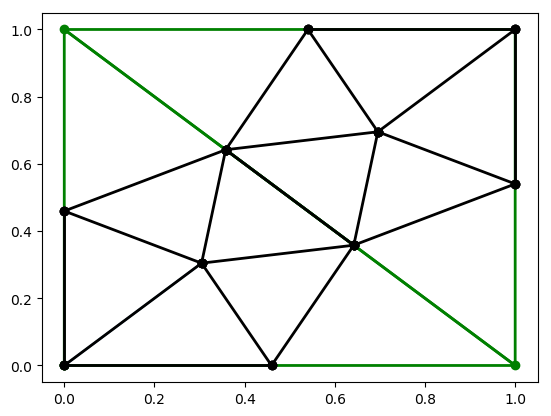

Pentágono superior:
  x = [1.0, 0.54035, 0.35796, 0.64204, 1.0]
  y = [1.0, 1.0, 0.64204, 0.35796, 0.54035]


In [9]:
# Dibujar triángulo
x = Float64[0,0,M,0]
y = Float64[0,M,0,0]
plot(x, y, color="green", linewidth=2, marker="o")
grid()

# Centro del pentágono inscrito
d1 = L1 + m*(H/2 - L1)
println(" d1 = $d1")
D = sqrt(M^2 - (H/2)^2)
d2 = D-d1
xCinf = 1/sqrt(2) * d2
yCinf = xCinf
C=Float64[xCinf,yCinf]
x=[0,C[1]]
y=[0,C[2]]
plot(x,y)


# Vértices extremos a los 4 radios del pentágono
R = L/(2*sin(α/2))
#γ = α - π/4
γ = α - π/2 - π/4
xVertInf = Float64[0]
yVertInf = Float64[0]
for i=0:3
    a = γ + i*α
    xv = xCinf+R*cos(a)
    yv = yCinf+R*sin(a)
    x=[xCinf,xv]
    y=[yCinf,yv]
    push!(xVertInf,xv)
    push!(yVertInf,yv)
end

# Dibujar pentágono 1
colorpenta="black"
for i=1:5
    plot([xCinf, xVertInf[i]], [yCinf, yVertInf[i]], marker="o", color=colorpenta, linewidth=2, label=i) # Radios del pentágono
    if i==5
        plot( [ xVertInf[5], xVertInf[1]], [yVertInf[5], yVertInf[1]], color=colorpenta, marker="o",linewidth=2)
    else
        plot( [ xVertInf[i], xVertInf[i+1]], [yVertInf[i], yVertInf[i+1]], color=colorpenta, marker="o", linewidth=2)
    end
end
#legend()
println("Pentágono inferior:")
println("  x = $xVertInf")
println("  y = $yVertInf")

# Pentágono superior -------------------------------
# Dibujar triángulo

x = Float64[M, M,  0, M]
y = Float64[0, M,  M, 0]
plot(x, y, color="green", linewidth=2)
grid()

xCsup = M-xCinf
yCsup = M-yCinf
xVertSup = zeros(5)
yVertSup = zeros(5)
for i in 1:5
    xVertSup[i] = M-xVertInf[i]
    yVertSup[i] = M-yVertInf[i]
end

# Dibujar pentágono superior
colorpenta="black"
for i=1:5
    plot([xCsup, xVertSup[i]], [yCsup, yVertSup[i]], marker="o", color=colorpenta, linewidth=2, label=i) # Radios del pentágono
    if i==5
        plot( [ xVertSup[5], xVertSup[1]], [yVertSup[5], yVertSup[1]], color=colorpenta, marker="o", linewidth=2)
    else
        plot( [ xVertSup[i], xVertSup[i+1]], [yVertSup[i], yVertSup[i+1]], color=colorpenta, marker="o", linewidth=2)
    end
end
#legend()

println("Pentágono superior:")
println("  x = $xVertSup")
println("  y = $yVertSup")

## Definimos las coordenadas de los 12 vértices

Se establecerá la siguiente ordenación (en el cuadrado unidad, aunque la figura se represetne (0,0.5)^2):
![](cuadrado_ang_agudos.png)

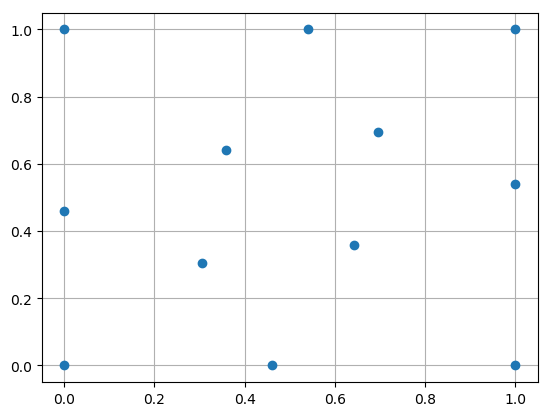

In [48]:
vert = zeros(12,2) # Coordeenadas (x,y)
vert[1,:]  = [0,0]
vert[2,:]  = [xVertInf[2], 0]
vert[3,:]  = [1, 0]
vert[4,:]  = [1, yVertSup[5]]
vert[5,:]  = [1, 1]
vert[6,:]  = [xVertSup[2], 1]
vert[7,:]  = [0, 1]
vert[8,:]  = [0, yVertInf[5]]
vert[9,:]  = [xCinf, yCinf]
vert[10,:] = [xVertInf[3], yVertInf[3]]
vert[11,:] = [xCsup, yCsup,]
vert[12,:] = [xVertInf[4], yVertInf[4]]
plot( vert[:,1], vert[:,2], marker="o", linestyle="")
grid()

#### Prueba de mallado del cuadrado $[0.5,1]\times [1,2]$

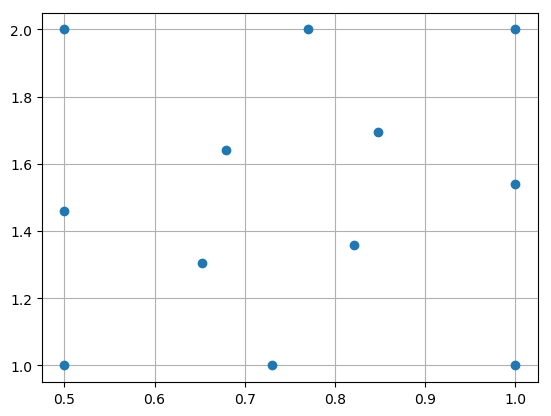

In [49]:
using LinearAlgebra

x₀ = 1/2; y₀=1
x₁ = 1;   y₁=2
Δx = x₁-x₀
Δy = y₁-y₀

Homotecia = Diagonal([ Δx, Δy] )
Traslación = ones(12,2)*Diagonal([x₀, y₀])

vert2 = vert*Homotecia + Traslación
plot( vert2[:,1], vert2[:,2], marker="o", linestyle="")
grid()

### Definimos una función para mallar un cuadrado usando $(14n)^2$ triángulos agudos

La función grabará el resultado en un fichero freefem cuyo nombre se pasa como parámetro

In [64]:
function square_acute_mesh(n, output_file="square_acute_mesh_$n.msh")
    nt = 14*n^2
    nv = 12*n^2 - 3*n*(n-1) # Número de vértices

    println("Saving mesh to '$output_file'")
    open("/tmp/t.txt", "w") do f
        f.wr
    end
end
square_acute_mesh(3)

Saving mesh to 'square_acute_mesh_3.msh'


square_acute_mesh_3.txt
